
***Reva Bharara***

***Email : revabharara@gmail.com***

***Linkedin : https://www.linkedin.com/in/reva-bharara-a83a78241/***

### **Objective: To create a Machine Learning model that can classify mails as spam and ham (not spam)**

### *Index:*
1. Importing the dependencies
2. Importing relevant datasets
3. Data analysis
4. Data preprocessing
5. Model selection and prediction:
    * Logistic regression
    * SVM
    * Naive bayes
    * Decision trees
    * Randon Forest Classifier
6. Model comparison
7. Model implemetation and analysis
8. Conclusion
9. Credits

# -------------------------------------------------------------------------------------------------------
### *1. Impoting the dependencies*

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report



# -------------------------------------------------------------------------------------------------------
### *2. Importing relevant datasets*


In [2]:
# using pandas read_csv method to read the dataset and storing it in df_mail dataframe

df_mail=pd.read_csv('mail_data.csv')

In [3]:
df_mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# -------------------------------------------------------------------------------------------------------
### *3. data analysis*

In [4]:
# This tells is the number of rows and columns in the dataframe
df_mail.shape

(5572, 2)

In [5]:
# This gives the information about the dataset
df_mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# -------------------------------------------------------------------------------------------------------
### *4. Data Preprocessing*

#### since there are no missing values in the dataset, we dont need to replace them with empty string in data preprocessing

In [6]:
# Exploratory data analysis using .describe()
df_mail.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# checking the number of null rows
df_mail.isnull().sum()

Category    0
Message     0
dtype: int64

*Here we can see that none of the rows contain any empty rows so we don't need to clean any Nonetype, NA, empty values and replace them with empty strings.*

### Label encoding
Lebl encoding is a crucial part of data preproceswsing since it is easier to predict categorical data that is in numerical form

### *spam = 1*
### *ham = 0*

In [8]:
df_mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# filtering all the rows of ham category
ham_filt=df_mail['Category']=='ham'
df_mail.loc[ham_filt,'Category']=0

# filtering all the rows for the spam category
spam_filt=df_mail['Category']=='spam'
df_mail.loc[spam_filt,'Category']=1

# viewing the changed dataframe
df_mail.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot: xlabel='Category', ylabel='Count'>

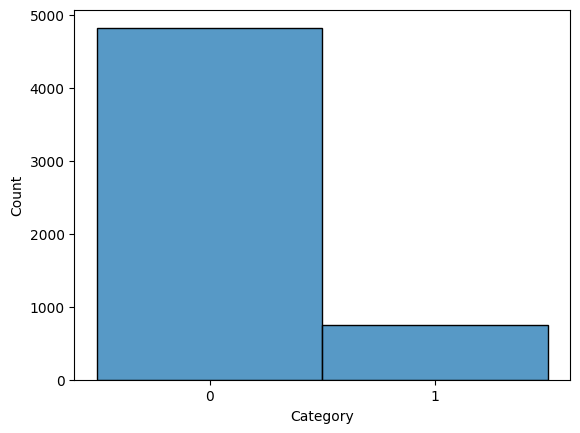

In [46]:
%matplotlib inline
# visualizing the frequency counts of spam and ham mail in the dataset usinh a histogram
sns.histplot(df_mail['Category'].astype('str'))



# -------------------------------------------------------------------------------------------------------
### *Separating the independent variables and Target variables*
1. We first split the labels and the texts
2. Then we use the train test split to split the dataset into training and testing data
3. We perform feature extraction so that the text data can be evalauted (using the TfidfVectorizer)

#### *split the labels and the texts*

In [11]:
# x contains all the email content
x=df_mail['Message']
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [12]:
# y contains all the categories
y=df_mail["Category"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: object

#### *splitting the data into train test split*

In [13]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(X_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


#### *Feature extraction*
Feature extraction is done so that we can convert the textual matter present in the emails into feature vectors (numerical representation of textual data) that are easily intrepretable and useful in making predictions

Here we use the *Tfidfvectorizer.*

In [15]:
# first we create a TfidVectorizer object
vectorizer=TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [16]:
# fitting and transforming the training corpus
X_train_vector=vectorizer.fit_transform(X_train)
X_test_vector=vectorizer.transform(X_test)

In [17]:
print(X_train_vector[0:5])
print("This is the vectorized form of the mail")

  (0, 4334)	0.42941702167641554
  (0, 3958)	0.6161071828926097
  (0, 6586)	0.44333254982109394
  (0, 6927)	0.48935591439341625
  (1, 2121)	0.3573617143022146
  (1, 1428)	0.5869421390016223
  (1, 6971)	0.42812434651556874
  (1, 3168)	0.5869421390016223
  (2, 5115)	0.3408491178137899
  (2, 7353)	0.31988118061968496
  (2, 3852)	0.3408491178137899
  (2, 4884)	0.35749230587184955
  (2, 5695)	0.35749230587184955
  (2, 806)	0.26730249393705324
  (2, 5894)	0.35749230587184955
  (2, 1876)	0.28751725124107325
  (2, 6878)	0.35749230587184955
  (3, 197)	0.36522237107066735
  (3, 3723)	0.16297045459835785
  (3, 2435)	0.26698378141852
  (3, 1825)	0.26858331513730566
  (3, 5231)	0.2266831802864503
  (3, 300)	0.2915969875465198
  (3, 7248)	0.23571908490908416
  (3, 5005)	0.3169028431039865
  (3, 2060)	0.24915048132454623
  (3, 7065)	0.32795623716393424
  (3, 7000)	0.30072945056088285
  (3, 7297)	0.22192369472149484
  (3, 1876)	0.3080768784015236
  (4, 6124)	0.48347454394369993
  (4, 6057)	0.4113133047

In [18]:
# converting the labels into type int
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

# -------------------------------------------------------------------------------------------------------
### 5. Model selection and Prediction

###  In this section we go over five different approaches of filtering out the spam emails using machine learning. They include:
1. Logistic Regression
2. Decision Trees
3. Support Vector Machine (SVM)
4. Naive Bayes
5. Random Forest

#### *In the end we will also be comapring the accuracy of each of these models using visualisation techniques to find which model works best.*

## ***Logistic Regression***
Logistic Regression uses the signoid function to tell us the probability of an event to be true.

In this case it gives us the probability of the mail being spam (Yhat).

Y_hat=P(Y=1|X)

In [19]:
# creating a Logistic resgression object
logr=LogisticRegression(C=0.01, solver='liblinear')

# fitting the model with the training data corpus
logr.fit(X_train_vector, Y_train)


LogisticRegression(C=0.01, solver='liblinear')

In [20]:
print('Results for training set')

# making in sample prediction on the training corpus
Yhat_train=logr.predict(X_train_vector)

# Calculating the accuracy, f1_score
as_logr_train= accuracy_score(Y_train, Yhat_train)
f1_logr_train=f1_score(Y_train, Yhat_train, average='weighted')

print('Accuracy score: ', as_logr_train)
print('F1 score: ', f1_logr_train)

Results for training set
Accuracy score:  0.8678483284720664
F1 score:  0.8064474076948835


In [21]:
print('Results for test set')

# making out of sample prediction on the testing corpus
Yhat_test=logr.predict(X_test_vector)

# Calculating the accuracy, f1_score
as_logr_test= accuracy_score(Y_test, Yhat_test)
f1_logr_test= f1_score(Y_test, Yhat_test, average='weighted')

print('Accuracy score: ',as_logr_test)
print('F1 score: ', f1_logr_test)

Results for test set
Accuracy score:  0.8582959641255605
F1 score:  0.7928467545059473


## ***Decision Trees***
A decision tree is a popular machine learning algorithm that works by recursively partitioning the data into smaller subsets based on the values of input features, until a stopping criterion is met. 


In [22]:
# creating the decision tree object
dt=DecisionTreeClassifier(criterion='entropy')

# fitting the Decision tree object
dt.fit(X_train_vector,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
print('Resuts for training set')

# making in sample prediction on the training corpus
Yhat_train_dt=dt.predict(X_train_vector)

# Calculating the accuracy, f1_score
as_dt_train= accuracy_score(Y_train, Yhat_train_dt)
f1_dt_train=f1_score(Y_train, Yhat_train_dt, average='weighted')

print('Accuracy score: ', as_dt_train)
print('F1 score: ', f1_dt_train)

Resuts for training set
Accuracy score:  1.0
F1 score:  1.0


In [24]:
print('Results for test set')

# making in sample prediction on the training corpus
Yhat_test_dt=dt.predict(X_test_vector)

# Calculating the accuracy, f1_score
as_dt_test= accuracy_score(Y_test, Yhat_test_dt)
f1_dt_test=f1_score(Y_test, Yhat_test_dt, average='weighted')

print('Accuracy score: ', as_dt_test)
print('F1 score: ', f1_dt_test)

Results for test set
Accuracy score:  0.9614349775784753
F1 score:  0.9606239968596916


## ***SVM (Support Vector Machine)***
Support Vector Machine (SVM) works by finding the best possible boundary between different data points by transforming it into a higher dimention such that the decsion boundary is a hyperplane

In [25]:
# creating an svm object for classification
svm=SVC(kernel='rbf')

# fitting the model with the training data
svm.fit(X_train_vector, Y_train)

SVC()

In [26]:
print('Results for training set')

# making in sample prediction on the training corpus
Yhat_train_svm=svm.predict(X_train_vector)

# Calculating the accuracy, f1_score
as_svm_train= accuracy_score(Y_train, Yhat_train_svm)
f1_svm_train=f1_score(Y_train, Yhat_train_svm, average='weighted')

print('Accuracy score: ', as_svm_train)
print('F1 score: ', f1_svm_train)

Results for training set
Accuracy score:  0.9984294368409243
F1 score:  0.9984254525150595


In [27]:
print('Results for test set')

# making in sample prediction on the training corpus
Yhat_test_svm=svm.predict(X_test_vector)

# Calculating the accuracy, f1_score
as_svm_test= accuracy_score(Y_test, Yhat_test_svm)
f1_svm_test=f1_score(Y_test, Yhat_test_svm, average='weighted')

print('Accuracy score: ', as_svm_test)
print('F1 score: ', f1_svm_test)

Results for test set
Accuracy score:  0.9730941704035875
F1 score:  0.9718906322045336


## ***Naive Bayes***

Naive Bayes assumes that the features we're looking at are all independent of each other, which is usually not true in the real world, hence the term "naive".


In [28]:
# creating a naive bayes model object
nb=MultinomialNB()

# fitting the model with the training corpus from the dataset
nb.fit(X_train_vector, Y_train)

MultinomialNB()

In [29]:
print('Results for training set')

# making in sample prediction on the training corpus
Yhat_train_nb=nb.predict(X_train_vector)

# Calculating the accuracy, f1_score
as_nb_train= accuracy_score(Y_train, Yhat_train_nb)
f1_nb_train=f1_score(Y_train, Yhat_train_nb, average='weighted')

print('Accuracy score: ', as_nb_train)
print('F1 score: ', f1_nb_train)

Results for training set
Accuracy score:  0.9838456360780794
F1 score:  0.9833942981249612


In [30]:
print('Results for test set')

# making in sample prediction on the training corpus
Yhat_test_nb=nb.predict(X_test_vector)

# Calculating the accuracy, f1_score
as_nb_test= accuracy_score(Y_test, Yhat_test_nb)
f1_nb_test=f1_score(Y_test, Yhat_test_nb, average='weighted')

print('Accuracy score: ', as_nb_test)
print('F1 score: ', f1_nb_test)

Results for test set
Accuracy score:  0.9614349775784753
F1 score:  0.9588214886623955


## ***Random forest classification***


In [83]:
# creating a classifier object
clf=RandomForestClassifier(n_jobs=2, random_state=1)

# fitting the model with the training corpus
clf.fit(X_train_vector, Y_train)

RandomForestClassifier(n_jobs=2, random_state=1)

In [84]:
print('Results for training set')

# making in sample prediction on the training corpus
Yhat_train_clf=clf.predict(X_train_vector)

# Calculating the accuracy, f1_score
as_clf_train= accuracy_score(Y_train, Yhat_train_clf)
f1_clf_train=f1_score(Y_train, Yhat_train_clf, average='weighted')

print('Accuracy score: ', as_clf_train)
print('F1 score: ', f1_clf_train)

Results for training set
Accuracy score:  1.0
F1 score:  1.0


In [85]:
print('Results for test set')

# making in sample prediction on the training corpus
Yhat_test_clf=clf.predict(X_test_vector)

# Calculating the accuracy, f1_score
as_clf_test= accuracy_score(Y_test, Yhat_test_clf)
f1_clf_test=f1_score(Y_test, Yhat_test_clf, average='weighted')

print('Accuracy score: ', as_clf_test)
print('F1 score: ', f1_clf_test)

Results for test set
Accuracy score:  0.9730941704035875
F1 score:  0.9719802139473738


# -------------------------------------------------------------------------------------------------------
### 6. Model Comparsion
In this section we will be comparing the models and analysing them besed on their evaluation results

In [87]:
# creating a dataframe for all the madels
evaluation_df=pd.DataFrame({"Model":['Logistic Regression','Decision Tree','SVM','Naive Bayes','Random Forest Classification'],
                            "Accuracy score Training Corpus":[as_logr_train,as_dt_train,as_svm_train,as_nb_train,as_clf_train],
                            "Accuracy score Testing Corpus":[as_logr_test,as_dt_test,as_svm_test,as_nb_test, as_clf_test], 
                            "F1 score Training Corpus":[f1_logr_train,f1_dt_train,f1_svm_train,f1_nb_train, f1_clf_train],
                            "F1 score Testing Corpus":[f1_logr_test,f1_dt_test,f1_svm_test,f1_nb_test,f1_clf_test]})
evaluation_df

,Model,Accuracy score Training Corpus,Accuracy score Testing Corpus,F1 score Training Corpus,F1 score Testing Corpus
0,Logistic Regression,0.867848,0.858296,0.806447,0.792847
1,Decision Tree,1.000000,0.961435,1.000000,0.960624
2,SVM,0.998429,0.973094,0.998425,0.971891
3,Naive Bayes,0.983846,0.961435,0.983394,0.958821
4,Random Forest Classification,1.000000,0.973094,1.000000,0.971980


#### To gather meaning ful insights let us first plot the dataframe so that we can choose the best model

Text(0.5, 1.0, 'Accuracy scores of in sample vs out of sample predictions')

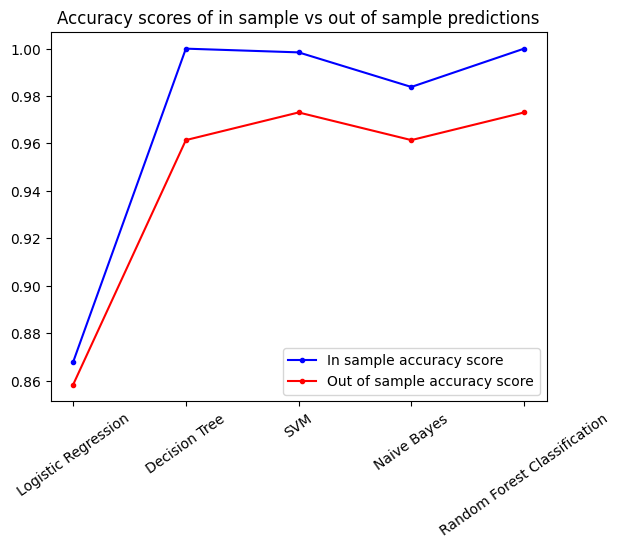

In [96]:
plt.plot('Model','Accuracy score Training Corpus',data=evaluation_df, marker='.', color='Blue',label='In sample accuracy score' )
plt.plot('Model', 'Accuracy score Testing Corpus',data=evaluation_df, marker='.', color='red', label='Out of sample accuracy score')
plt.legend()
plt.xticks(rotation=35)
plt.title('Accuracy scores of in sample vs out of sample predictions')


*From the above graph we can infer that when we perform in sample testing decision trees give us an accuracy score of 1 which is ideal but at the same time when we see the testing accuarcy score for the same it falls short. This means that the model was overfitting and thus captures noise*

*Since we need to deploy the model in real life scenerios we don't need to analyse the scores on training corpus for model evaluation. What we are concerned withn is how much accuarcy does the model give on unseen data cases.*

**In this case the SVM and Random Forest classifier works the best**

Text(0.5, 1.0, 'F1 scores of in sample vs out of sample predictions')

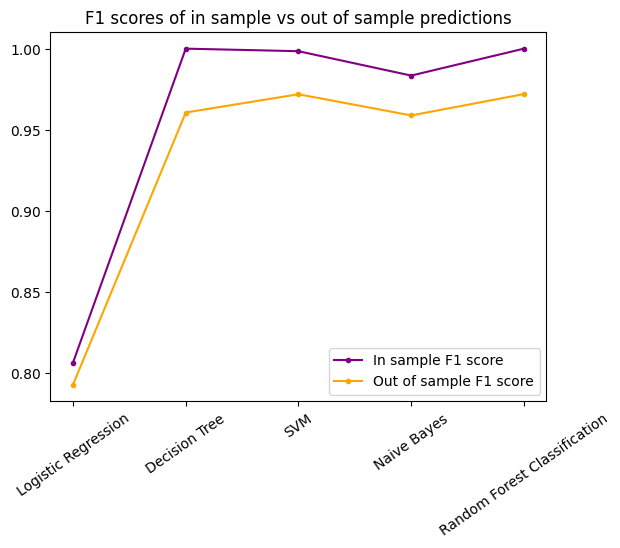

In [97]:
plt.plot('Model','F1 score Training Corpus',data=evaluation_df, marker='.', color='purple',label='In sample F1 score' )
plt.plot('Model', 'F1 score Testing Corpus',data=evaluation_df, marker='.', color='orange', label='Out of sample F1 score')
plt.legend()
plt.xticks(rotation=35)
plt.title('F1 scores of in sample vs out of sample predictions')


In this case (F1 scores) the SVM and Random forest classification work best on the testing cases.
However the Random Forest approach does have an edge over the SVM in terms of the F1 score making it the best classifier for the above scenerio

### After analysing the above models we find that the random forest classifier performs the best so we will choose that for classification of mails as spam or ham

# -------------------------------------------------------------------------------------------------------
### 7. Model Implementation and analysis
In this section we will be implementing the random forest model and having an in depth analyis for the same.

In [123]:
# printing the classification reprt to analyse the precision and recall
print(classification_report(Y_test, Yhat_test_clf, target_names=['ham','spam']))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       957
        spam       0.99      0.82      0.90       158

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



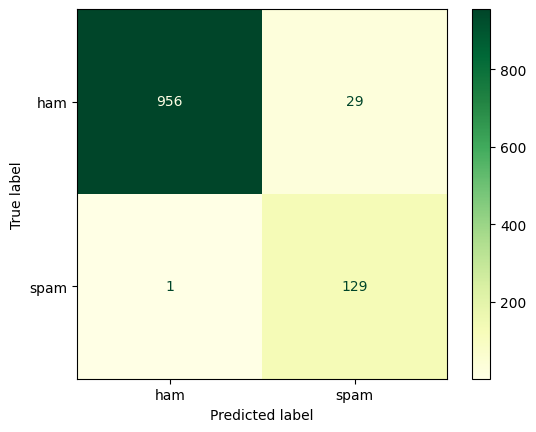

In [115]:
# creating a confusion matrix for the random forest classifier
cm=confusion_matrix(Yhat_test_clf, Y_test, labels=clf.classes_)

# creating a confusion matrix plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham','spam'])
disp.plot(cmap='YlGn')

### --------------------------------------------------------------------------------------------------------------------------------------------------------
### 8. Conclusion
In conclusion, this data science project aimed to classify spam and ham mails using various machine learning algorithms. The algorithms used were logistic regression, decision trees, SVM, Naive Bayes, and random forest. After thorough analysis, it was observed that the random forest algorithm outperformed the others in terms of accuracy and F1 score.

The results showed that the random forest algorithm had an accuracy of 97.3094% and an F1 score of 97.1980%.

This project shows that the random forest algorithm is an effective method for classifying spam and ham mails. However, it is important to note that the performance of the algorithm can be improved by tuning hyperparameters or using other techniques such as feature selection.

### --------------------------------------------------------------------------------------------------------------------------------------------------------
### 9. Credits

***Reva Bharara***

***Email : revabharara@gmail.com***

***Linkedin : https://www.linkedin.com/in/reva-bharara-a83a78241/***
